Exploration Data Analysis (EDA)#

This esteps is important to understand better the dataset and check whether any processing measures or factors need to be taken into account before developing the 
classification model.



In [59]:
import pandas as pd

In [60]:
df = pd.read_csv('log2.csv')
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


Exploring the data structure

df.info() to get an overview of the data frame 
df.head() to display the first few rows of the dataframe
df.decribe () to generate summary statistics for numerical columns.

In [61]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


with this code we check for missing values

df.isnull().sum() to check missing values in each column.

In [62]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

this peace of code is been used to explore the categorical variables 

Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64


<Axes: xlabel='Action'>

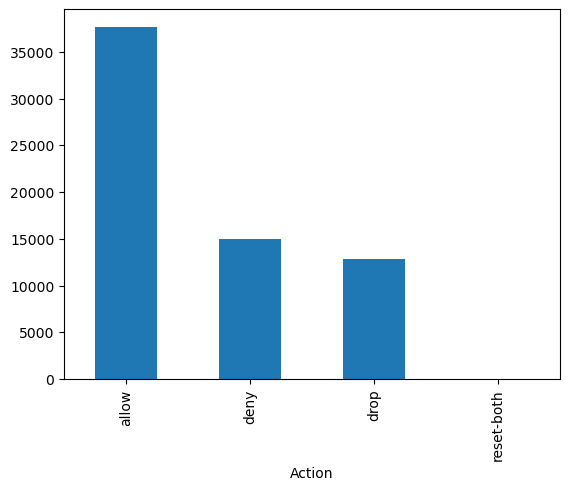

In [63]:
action_counts = df["Action"].value_counts()
print(action_counts)

action_counts.plot(kind = "bar") 

now we explore the numerical variables, looking for outliers or unusual patterns 

array([[<Axes: title={'center': 'Source Port'}>,
        <Axes: title={'center': 'Destination Port'}>,
        <Axes: title={'center': 'NAT Source Port'}>],
       [<Axes: title={'center': 'NAT Destination Port'}>,
        <Axes: title={'center': 'Bytes'}>,
        <Axes: title={'center': 'Bytes Sent'}>],
       [<Axes: title={'center': 'Bytes Received'}>,
        <Axes: title={'center': 'Packets'}>,
        <Axes: title={'center': 'Elapsed Time (sec)'}>],
       [<Axes: title={'center': 'pkts_sent'}>,
        <Axes: title={'center': 'pkts_received'}>, <Axes: >]],
      dtype=object)

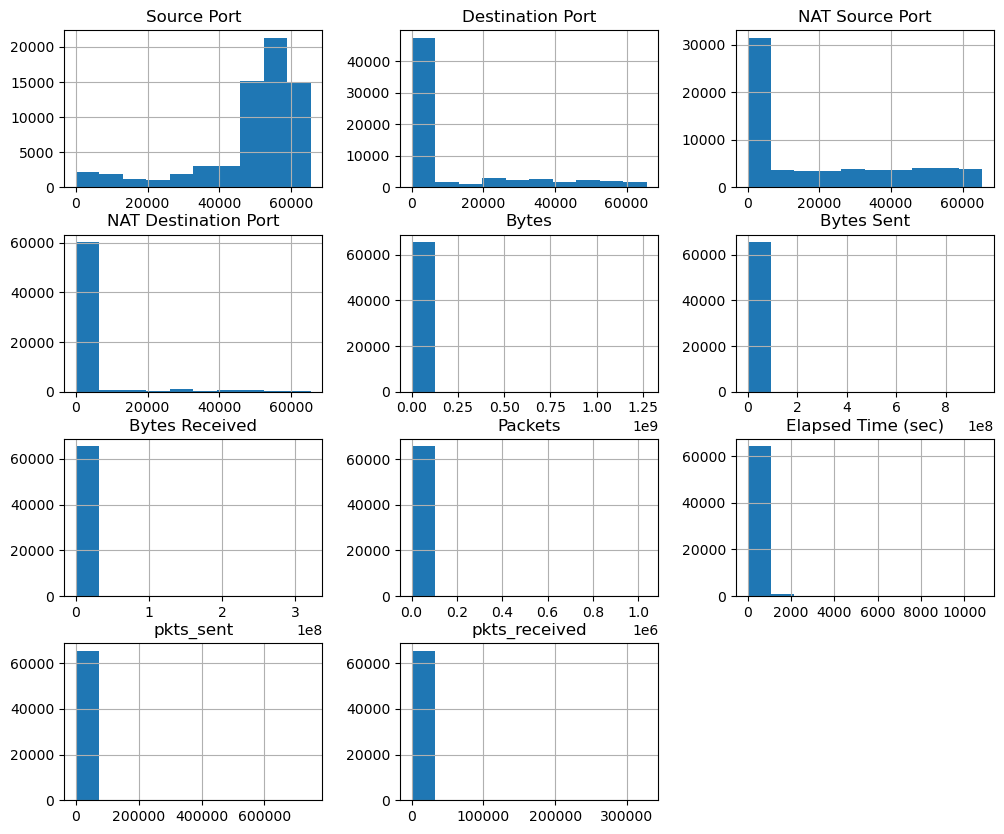

In [64]:
df.hist(figsize=(12, 10))

with this code we analyse relationships between variables

Action,allow,deny,drop,reset-both
Source Port,,,,
0,85,88,0,0
5,0,1,0,0
20,1,1,0,0
22,4,0,0,0
25,2,0,0,0
...,...,...,...,...
65530,8,0,1,0
65531,2,0,0,0
65532,3,0,0,0


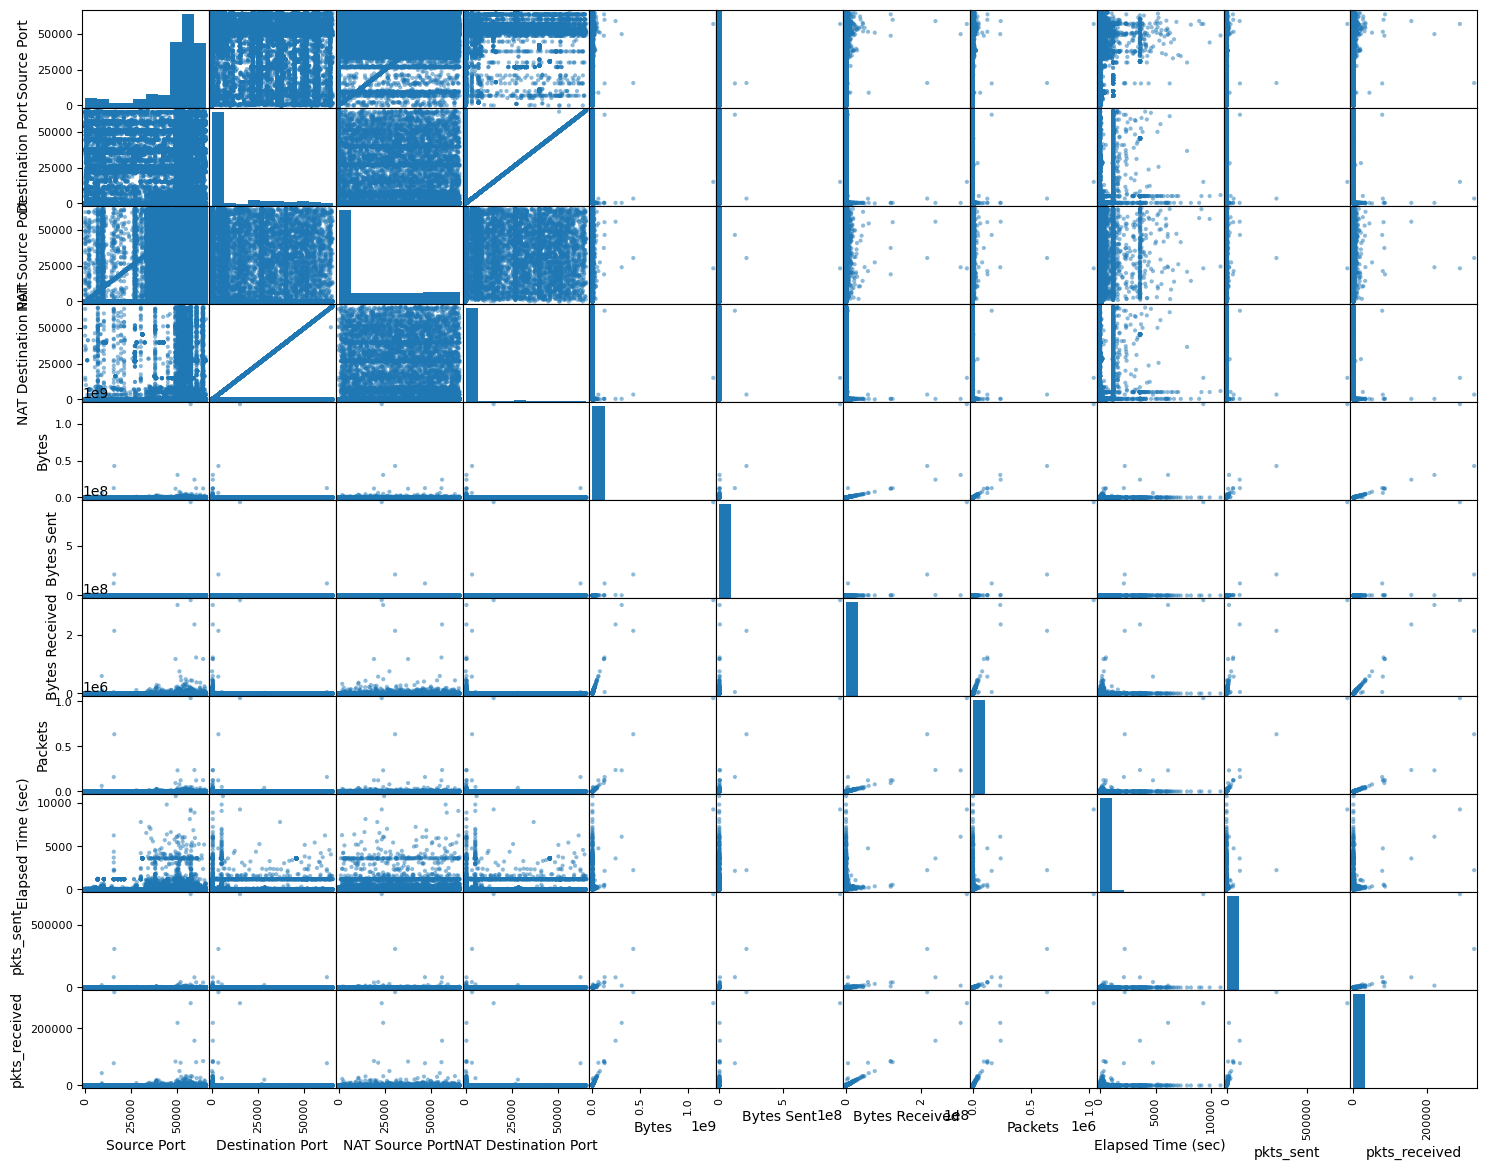

In [68]:
pd.plotting.scatter_matrix(df, figsize=(18, 14))

pd.crosstab(df['Source Port'], df['Action'])

Draw Insights and Make Observations: